# Python Question 8 :
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("episode_output.csv")
data.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


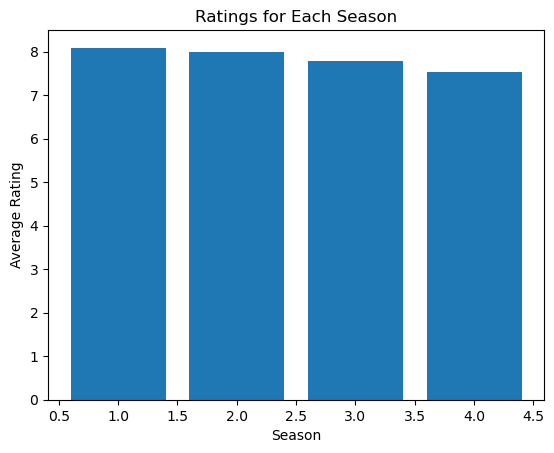

In [2]:
season_ratings = data.groupby("season")["average_rating"].mean().reset_index()
plt.bar(season_ratings["season"], season_ratings["average_rating"])
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Ratings for Each Season")
plt.show()

In [3]:
high_rating_episodes = data[data["average_rating"] > 8]
high_rating_episodes = high_rating_episodes.groupby("season")["name"].apply(list).reset_index()
for index, row in high_rating_episodes.iterrows():
    season = row["season"]
    episodes = row["name"]
    print(f"Season {season} - High Rating Episodes: {episodes}")

Season 1 - High Rating Episodes: ["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind']
Season 2 - High Rating Episodes: ['Kiksuya', 'Vanishing Point', 'The Passenger']


In [4]:
data["airdate"] = pd.to_datetime(data["airdate"])
aired_before_2019 = data[data["airdate"] < pd.Timestamp(2019, 5, 1)]
aired_before_2019_episode_names = aired_before_2019["name"].tolist()
print("Episodes Aired Before May 2019:")
aired_before_2019_episode_names

Episodes Aired Before May 2019:


['The Original',
 'Chestnut',
 'The Stray',
 'Dissonance Theory',
 'Contrapasso',
 'The Adversary',
 "Trompe L'Oeil",
 'Trace Decay',
 'The Well-Tempered Clavier',
 'The Bicameral Mind',
 'Journey Into Night',
 'Reunion',
 'Virtù e Fortuna',
 'The Riddle of the Sphinx',
 'Akane No Mai',
 'Phase Space',
 'Les Écorchés',
 'Kiksuya',
 'Vanishing Point',
 'The Passenger']

In [5]:
max_rating_episodes = data.groupby("season").apply(lambda x: x[x["average_rating"] == x["average_rating"].max()])["name"]
min_rating_episodes = data.groupby("season").apply(lambda x: x[x["average_rating"] == x["average_rating"].min()])["name"]
rating_comparison = pd.concat([max_rating_episodes, min_rating_episodes], axis=1)
rating_comparison.columns = ["Highest Rating Episode", "Lowest Rating Episode"]
print("Episode with Highest and Lowest Rating for Each Season:")
rating_comparison.head()

Episode with Highest and Lowest Rating for Each Season:


Highest Rating Episode Lowest Rating Episode
season                                                
1      9      The Bicameral Mind                   NaN
2      17                Kiksuya                   NaN
3      20           Parce Domine                   NaN
       23   The Mother of Exiles                   NaN
4      32               Zhuangzi                   NaN

In [6]:
most_popular_episodes = data.groupby("season").apply(lambda x: x[x["average_rating"] == x["average_rating"].max()])["summary"]
print("Summary for the Most Popular Episode in Every Season:")
most_popular_episodes

Summary for the Most Popular Episode in Every Season:


season    
1       9     Delores finds out the truth about William's fa...
2       17    Another of Westworld's Host revolutionaries is...
3       20    If you're stuck in a loop, try walking in a st...
        23               The truth doesn't always set you free.
4       32                                        God is bored.
Name: summary, dtype: object